<h1><b>Extreme-Weather Temperature Prediction</b></h>



<h4>Steps:</h4>
1.Dataset Download<br>
2.Exploratry Data Analysis<br>
3.Data Visualization<br>
4.Model selection<br>
5.Model Fitting<br>
6.Accuracy Scores<br>
<small><i>Note:The 2nd and 3rd steps can be done parallely</i></small>

**Importing all the libraries requied**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


**Read the dataset using pandas**

In [ ]:
dataset=pd.read_csv("train_dataset.csv")

In [ ]:
dataset.tail(15)

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
4722,28.1,22.9,68.782555,93.730911,30.495142,24.881194,6.192995,95.180879,0.420800,0.486447,...,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5701.980957,29.2
4723,33.1,23.8,52.600994,76.919106,33.867561,27.840314,6.449558,26.709733,0.297295,0.233504,...,0.000000,0.000000,0.000000,0.126626,37.5507,126.937,30.0464,0.8552,5405.218750,33.0
4724,26.2,22.3,93.718727,98.736191,24.714775,23.806743,13.383920,24.086394,0.818817,0.925857,...,0.115703,4.070562,0.123219,0.000690,37.6046,126.991,212.3350,2.7850,5746.562988,23.8
4725,28.7,22.6,87.535263,98.125633,27.193201,24.297690,11.247730,40.640605,0.667373,0.692811,...,0.011935,0.505122,0.079492,0.043291,37.6450,127.022,45.7160,2.5348,5807.132324,26.6
4726,34.3,22.7,57.622585,88.948425,26.683981,23.478600,16.534842,80.047954,0.556059,0.315898,...,0.260234,0.102718,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5547.546875,27.5
4727,29.3,23.7,41.252380,85.980911,30.413458,23.463496,7.900691,32.913851,0.303460,0.169487,...,0.000000,0.000000,0.000000,0.000000,37.5776,127.083,59.8324,2.6865,5743.136230,31.6
4728,29.4,23.2,56.356941,92.619759,27.699699,21.766075,6.032217,47.586253,0.160976,0.308147,...,0.000000,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5863.992188,30.5
4729,28.5,20.8,60.049625,89.762085,30.185573,22.907214,7.333313,88.886790,0.338823,0.415133,...,0.000000,0.000000,0.666416,0.261377,37.6181,127.004,146.5540,4.7296,5735.703613,31.2
4730,29.4,20.5,44.315651,83.230293,31.494625,23.298219,5.697999,29.137052,0.019831,0.033935,...,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5517.881836,31.5
4731,20.0,15.1,35.652172,89.973190,24.323737,16.128899,7.087329,108.981108,0.046182,0.014955,...,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,4614.761230,23.8


**About the Dataset**

In [ ]:
dataset.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,4699.000000,4699.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4693.000000,4692.000000,...,4692.000000,4692.000000,4692.000000,4692.000000,4736.000000,4736.000000,4736.000000,4736.000000,4736.000000,4723.000000
mean,29.791551,23.212854,56.770517,88.373851,29.604026,23.502079,7.076717,62.960203,0.365688,0.354576,...,0.584913,0.480019,0.280509,0.275987,37.544161,126.991464,62.008833,1.261337,5345.403831,30.289583
std,2.991555,2.441754,14.548587,7.101260,2.942278,2.356721,2.166199,34.051160,0.263441,0.258556,...,1.921270,1.766408,1.193556,1.251273,0.050456,0.080260,54.716340,1.373141,430.530707,3.127418
min,20.000000,11.300000,19.794666,61.589077,17.624954,14.301375,3.007954,-8.569043,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4371.684570,17.400000
25%,27.700000,21.600000,46.020870,84.217194,27.661763,22.094317,5.685788,37.386415,0.141668,0.138722,...,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5007.588379,28.250000
50%,29.900000,23.400000,54.992626,89.780304,29.681767,23.748153,6.537185,57.354086,0.310198,0.311624,...,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5441.987305,30.500000
75%,32.100000,24.900000,67.189110,93.682198,31.678691,25.124971,7.951802,84.764529,0.575489,0.557528,...,0.044444,0.014972,0.006789,0.000000,37.577600,127.042000,59.832400,1.767800,5735.401001,32.700000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4737 entries, 0 to 4736
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      4699 non-null   float64
 1   Present_Tmin      4699 non-null   float64
 2   LDAPS_RHmin       4693 non-null   float64
 3   LDAPS_RHmax       4693 non-null   float64
 4   LDAPS_Tmax_lapse  4693 non-null   float64
 5   LDAPS_Tmin_lapse  4693 non-null   float64
 6   LDAPS_WS          4693 non-null   float64
 7   LDAPS_LH          4693 non-null   float64
 8   LDAPS_CC1         4693 non-null   float64
 9   LDAPS_CC2         4692 non-null   float64
 10  LDAPS_CC3         4692 non-null   float64
 11  LDAPS_CC4         4692 non-null   float64
 12  LDAPS_PPT1        4692 non-null   float64
 13  LDAPS_PPT2        4692 non-null   float64
 14  LDAPS_PPT3        4692 non-null   float64
 15  LDAPS_PPT4        4692 non-null   float64
 16  lat               4736 non-null   float64


In [ ]:
dataset["Next_Tmax"]

0       26.4
1       25.6
2       30.6
3       27.2
4       32.8
        ... 
4732    29.3
4733    34.8
4734    29.3
4735    24.4
4736     NaN
Name: Next_Tmax, Length: 4737, dtype: float64

**Total number of null in taget colomns**

In [ ]:
#The target column is Next_Tmax
total=6589-6567
total#total number of null values

22

*Drop the null values that are present in target column*

In [ ]:
dataset.dropna(subset=["Next_Tmax"],inplace=True)

<b>Split the dataset <ul><li>x->Independent features</li><li>y->Dependent feature(Target)</li></ul> 

In [ ]:
x=dataset.drop("Next_Tmax",axis=1)
y=dataset["Next_Tmax"]

In [ ]:
list=dataset.select_dtypes(include="float64").columns.tolist()

In [ ]:
list.pop()

'Next_Tmax'

**Correlation between colomns**

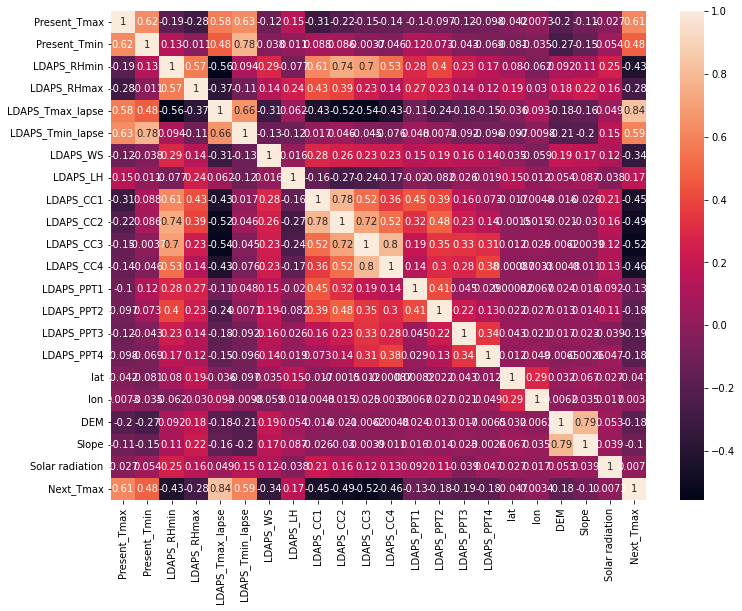

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(dataset.corr(),annot=True);

From the above plot we can observe that the Next_Tmax has high correlation with the below ploted features

Text(0.5, 1.0, 'Present_Tmax vs Next_Tmax')

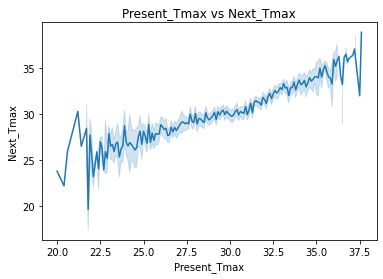

In [ ]:
sns.lineplot(data=dataset,x=x["Present_Tmax"],y=y)
plt.title("Present_Tmax vs Next_Tmax")

Text(0.5, 1.0, 'Present_Tmin vs Next_Tmax')

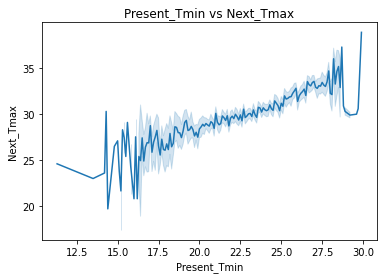

In [ ]:
sns.lineplot(data=dataset,x="Present_Tmin",y=y)
plt.title("Present_Tmin vs Next_Tmax")

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Next_Tmax'>

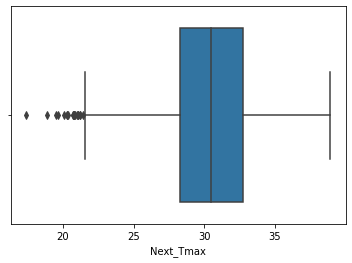

In [ ]:
sns.boxplot(dataset["Next_Tmax"])

From the above box-plot we find that there are few outliers

<b>Fill all the null values with the respective mean of the respective columns</b>

In [ ]:
imputer=SimpleImputer(strategy="mean").fit(dataset[list])
x[list]=imputer.transform(x[list])

In [ ]:
x.tail()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
4731,20.0,15.1,35.652172,89.973190,24.323737,16.128899,7.087329,108.981108,0.046182,0.014955,...,0.000630,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,4614.761230
4732,29.8,24.1,74.308113,92.395889,28.482545,24.936761,3.688808,49.408801,0.601730,0.421812,...,0.342264,0.386810,0.028404,0.008679,0.246116,37.5102,127.086,21.9668,0.1332,5335.196289
4733,32.0,23.7,41.687077,76.796936,34.178067,25.164897,6.773318,56.775359,0.185717,0.311940,...,0.139982,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,4835.805664
4734,32.0,27.0,70.782471,94.556427,28.240159,24.481340,4.231943,72.427419,0.866504,0.791191,...,0.054517,2.235954,4.085192,0.383903,0.000000,37.5776,126.838,12.3700,0.0985,4744.449219
4735,29.6,20.6,64.941620,93.619164,23.526810,18.578103,14.024128,68.638271,0.484274,0.703313,...,0.816378,0.000000,0.183403,0.452221,1.020149,37.4562,126.955,208.5070,5.1782,4615.589355


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4723 entries, 0 to 4735
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      4723 non-null   float64
 1   Present_Tmin      4723 non-null   float64
 2   LDAPS_RHmin       4723 non-null   float64
 3   LDAPS_RHmax       4723 non-null   float64
 4   LDAPS_Tmax_lapse  4723 non-null   float64
 5   LDAPS_Tmin_lapse  4723 non-null   float64
 6   LDAPS_WS          4723 non-null   float64
 7   LDAPS_LH          4723 non-null   float64
 8   LDAPS_CC1         4723 non-null   float64
 9   LDAPS_CC2         4723 non-null   float64
 10  LDAPS_CC3         4723 non-null   float64
 11  LDAPS_CC4         4723 non-null   float64
 12  LDAPS_PPT1        4723 non-null   float64
 13  LDAPS_PPT2        4723 non-null   float64
 14  LDAPS_PPT3        4723 non-null   float64
 15  LDAPS_PPT4        4723 non-null   float64
 16  lat               4723 non-null   float64


**Creating Validation set to validate using<br> 
1.LinearRegression<br>
2.SVM(SVR)<br>
3.DessionTree**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
modellr=LinearRegression()
modellr.fit(x_train,y_train)
y_predlr=modellr.predict(x_test)
modelsvm=SVR()
modelsvm.fit(x_train,y_train)
y_pred=modelsvm.predict(x_test)
modeldt=DecisionTreeRegressor()
modeldt.fit(x_train,y_train)
y_predt=modeldt.predict(x_test)

In [ ]:
import math
print("SVR RMS=",math.sqrt(mean_squared_error(y_pred,y_test)))
print("LinearRegresssion RMS=",math.sqrt(mean_squared_error(y_predlr,y_test)))
print("DessionTree RMS=",math.sqrt(mean_squared_error(y_predt,y_test)))

SVR RMS= 3.038568725607099
LinearRegresssion RMS= 1.5120929533516163
DessionTree RMS= 1.5989256272913488


we find that LinearRegression gives the most accurate resultes

**Using LinearRegression and svm prediction for the test set given** 

**Fitting the Model (LinearRegression) **

In [ ]:
model=LinearRegression().fit(x,y)

<h4><b>Test Dataset Cleaning</b></h4>

In [ ]:
testdataset=pd.read_csv("test_dataset.csv")

In [ ]:
testdataset

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,34.0,25.3,59.441780,87.809990,33.679278,27.864485,6.237572,82.372333,0.358150,0.462551,...,0.127188,0.000000,0.000000,0.056192,0.001105,37.4697,126.995,82.2912,2.2579,5269.604980
1,34.9,25.8,42.140888,87.437630,36.318381,28.056302,6.672544,73.152947,0.089003,0.058192,...,0.020227,0.000000,0.000000,0.000000,0.000000,37.5372,127.085,28.7000,0.6233,5071.220215
2,27.0,21.4,61.607719,82.623398,28.937996,22.920885,7.756562,60.288615,0.445716,0.252695,...,0.279000,0.020203,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.1554,4954.847656
3,33.1,27.1,50.549240,73.318398,33.253016,27.820149,5.626367,10.999599,0.196958,0.290637,...,0.603896,0.000000,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.5721,4865.184082
4,27.9,23.0,48.714233,90.838814,31.012719,24.287468,8.163316,33.094886,0.294709,0.101219,...,0.103166,0.000000,0.000000,0.000000,0.000000,37.5507,126.988,132.1180,0.5931,5377.179199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,29.7,23.1,62.276913,95.811707,28.846006,23.819296,5.072551,132.003884,0.238526,0.184225,...,0.011823,0.000000,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5537.372070
1159,33.1,26.8,43.443817,77.924614,34.647849,26.702540,5.553541,18.832901,0.173491,0.152533,...,0.050287,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.2713,5288.856445
1160,33.1,25.4,50.856052,92.149277,31.166726,26.287848,5.445318,109.267047,0.170750,0.118597,...,0.029190,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5055.825195
1161,32.0,24.1,46.339367,86.733521,31.816415,24.781543,6.074005,51.650029,0.342173,0.554225,...,0.143324,0.000000,0.000497,0.000000,0.000000,37.5372,127.085,28.7000,0.6233,5190.547852


In [ ]:
testdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      1154 non-null   float64
 1   Present_Tmin      1154 non-null   float64
 2   LDAPS_RHmin       1153 non-null   float64
 3   LDAPS_RHmax       1153 non-null   float64
 4   LDAPS_Tmax_lapse  1153 non-null   float64
 5   LDAPS_Tmin_lapse  1153 non-null   float64
 6   LDAPS_WS          1153 non-null   float64
 7   LDAPS_LH          1153 non-null   float64
 8   LDAPS_CC1         1153 non-null   float64
 9   LDAPS_CC2         1153 non-null   float64
 10  LDAPS_CC3         1153 non-null   float64
 11  LDAPS_CC4         1153 non-null   float64
 12  LDAPS_PPT1        1153 non-null   float64
 13  LDAPS_PPT2        1153 non-null   float64
 14  LDAPS_PPT3        1153 non-null   float64
 15  LDAPS_PPT4        1153 non-null   float64
 16  lat               1163 non-null   float64


In [ ]:
x_test=testdataset[list]
imputer0=SimpleImputer(strategy="mean").fit(testdataset[list])
x_test[list]=imputer0.transform(x_test[list])

In [ ]:
x_test

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,34.0,25.3,59.441780,87.809990,33.679278,27.864485,6.237572,82.372333,0.358150,0.462551,...,0.127188,0.000000,0.000000,0.056192,0.001105,37.4697,126.995,82.2912,2.2579,5269.604980
1,34.9,25.8,42.140888,87.437630,36.318381,28.056302,6.672544,73.152947,0.089003,0.058192,...,0.020227,0.000000,0.000000,0.000000,0.000000,37.5372,127.085,28.7000,0.6233,5071.220215
2,27.0,21.4,61.607719,82.623398,28.937996,22.920885,7.756562,60.288615,0.445716,0.252695,...,0.279000,0.020203,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.1554,4954.847656
3,33.1,27.1,50.549240,73.318398,33.253016,27.820149,5.626367,10.999599,0.196958,0.290637,...,0.603896,0.000000,0.000000,0.000000,0.000000,37.5507,127.040,26.2980,0.5721,4865.184082
4,27.9,23.0,48.714233,90.838814,31.012719,24.287468,8.163316,33.094886,0.294709,0.101219,...,0.103166,0.000000,0.000000,0.000000,0.000000,37.5507,126.988,132.1180,0.5931,5377.179199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,29.7,23.1,62.276913,95.811707,28.846006,23.819296,5.072551,132.003884,0.238526,0.184225,...,0.011823,0.000000,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5537.372070
1159,33.1,26.8,43.443817,77.924614,34.647849,26.702540,5.553541,18.832901,0.173491,0.152533,...,0.050287,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.2713,5288.856445
1160,33.1,25.4,50.856052,92.149277,31.166726,26.287848,5.445318,109.267047,0.170750,0.118597,...,0.029190,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5055.825195
1161,32.0,24.1,46.339367,86.733521,31.816415,24.781543,6.074005,51.650029,0.342173,0.554225,...,0.143324,0.000000,0.000497,0.000000,0.000000,37.5372,127.085,28.7000,0.6233,5190.547852


In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      1163 non-null   float64
 1   Present_Tmin      1163 non-null   float64
 2   LDAPS_RHmin       1163 non-null   float64
 3   LDAPS_RHmax       1163 non-null   float64
 4   LDAPS_Tmax_lapse  1163 non-null   float64
 5   LDAPS_Tmin_lapse  1163 non-null   float64
 6   LDAPS_WS          1163 non-null   float64
 7   LDAPS_LH          1163 non-null   float64
 8   LDAPS_CC1         1163 non-null   float64
 9   LDAPS_CC2         1163 non-null   float64
 10  LDAPS_CC3         1163 non-null   float64
 11  LDAPS_CC4         1163 non-null   float64
 12  LDAPS_PPT1        1163 non-null   float64
 13  LDAPS_PPT2        1163 non-null   float64
 14  LDAPS_PPT3        1163 non-null   float64
 15  LDAPS_PPT4        1163 non-null   float64
 16  lat               1163 non-null   float64


In [ ]:
output=pd.DataFrame(model.predict(x_test))

In [ ]:
output.to_csv("output0.csv")

In [ ]:
output

,0
0,34.628521
1,36.391982
2,29.581486
3,32.835325
4,30.551536
...,...
1158,31.726731
1159,34.840218
1160,32.854910
1161,32.042052
